In [28]:
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

This notebook explores models of urban scaling based on population and area of a city outlined in the following article:

Ribeiro, H.V., Rybski, D. & Kropp, J.P. Effects of changing population or density on urban carbon dioxide emissions. Nat Commun 10, 3204 (2019). https://doi.org/10.1038/s41467-019-11184-y

Using the cell below, the data for analysis can be selected. Details on available datasets are available in GitHub README under 'Data'.

In [31]:
year = 2016
observable = 'robberies'
region = 'europe'

if region == 'europe':
    %run ../data/eurostat/eurostat_formatting.ipynb
elif region == 'america':
    %run ../data/usa/america_formatting.ipynb

### Relationship between Population and Area


                  Area  
------------------------
const          0.7147   
               (1.2173) 
Population     0.5346***
               (0.0897) 
R-squared      0.1968   
R-squared Adj. 0.1913   
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


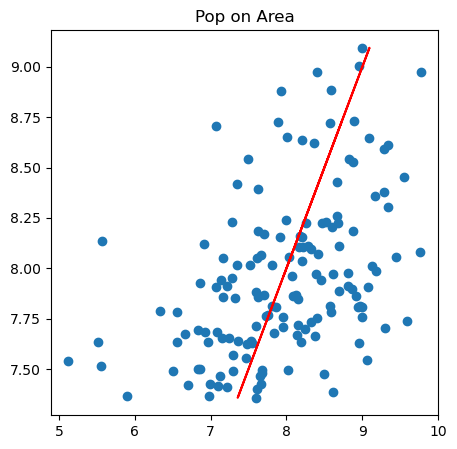

In [33]:
print(summary_col(ols_result_col, stars=True))

plt.figure(figsize=(5,5))
plt.scatter(df['Area'].values, y_pred_col)
plt.plot(y_pred_col, y_pred_col, color='red')
plt.title('Pop on Area')
plt.show()

### Simple Area and Population Models
First, we explore how the observable scales with population and area alone. Let $C$ denote the selected observable of interest, $P$, $A$ be population and area respectively.

Population: $\log C = \beta_{P}\log P$\
Area: $\log C = \beta_{A}\log A$


                   y I        y II  
------------------------------------
const          -10.5593*** 5.0302***
               (1.0064)    (0.8569) 
Population     1.3128***            
               (0.0741)             
Area                       0.2767** 
                           (0.1070) 
R-squared      0.6838      0.0441   
R-squared Adj. 0.6816      0.0375   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


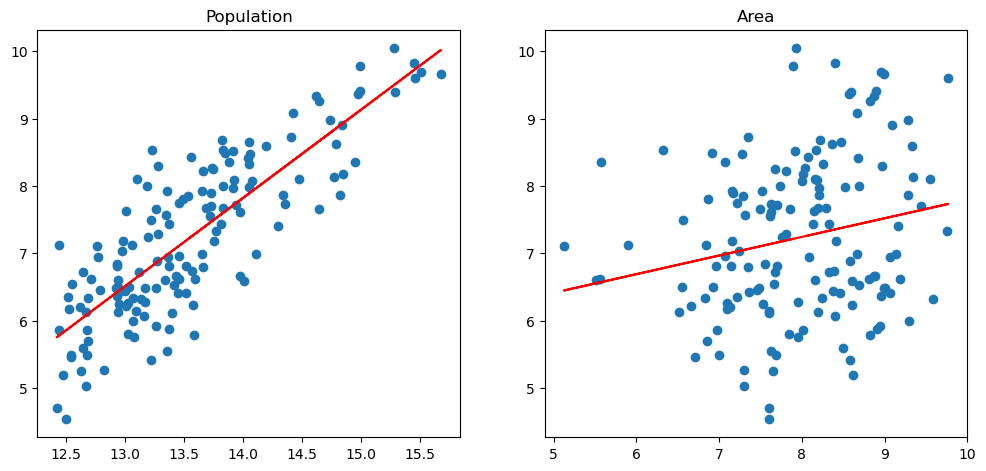

In [37]:
print(summary_col([ols_result_p,ols_result_a], stars=True))

plt.figure(figsize=(12,18))

plt.subplot(3, 2, 1)
plt.scatter(df['Population'], y.values)
plt.plot(df['Population'], y_pred_p, color='red')
plt.title('Population')

plt.subplot(3, 2, 2)
plt.scatter(df['Area'], y.values)
plt.plot(df['Area'], y_pred_a, color='red')
plt.title('Area')

plt.show()

### All Models
The article explores and compares various models. Mirroring this, we now add a Cobb-Douglas model, transcendental logarithm ('Translog') transcendental logarithm with additional squared parameters ('Full Translog') model, as defined in the article. Note they are presented in the order they are listed in the regression output table.

The plots indicate the predicted values of the selected observable on the x-axis against the realised values on the y-axis; deviation from the line then indicates the performance of that model over a range of city sizes.

Population: $\log C = \beta_{P}\log P$ \
Area: $\log C = \beta_{A}\log A$ \
Cobb-Douglas: $\log C = \beta_{P}\log P + \beta_{A}\log A$ \
Translog: $\log C = \beta_{P}\log P + \beta_{A}\log A + \beta_{C}\log(P)\log(A)$ \
Full translog: $\log C = \beta_{P}\log P + \beta_{A}\log A + \beta_{C}\log(P)\log(A) + \beta_{P'}(\log P)^2 + \beta_{A'}(\log A)^2$


                   y I        y II      y III     y IIII   y IIIII  
--------------------------------------------------------------------
const          -10.5593*** 5.0302*** -10.3754*** -7.9842  -31.7501**
               (1.0064)    (0.8569)  (0.9608)    (9.2012) (15.1535) 
Population     1.3128***             1.4504***   1.2712*  5.5165**  
               (0.0741)              (0.0789)    (0.6902) (2.2601)  
Area                       0.2767**  -0.2573***  -0.5489  -1.9423   
                           (0.1070)  (0.0655)    (1.1179) (1.3134)  
Interaction                                      0.0218   0.1140    
                                                 (0.0834) (0.1137)  
Population_sq                                             -0.1803*  
                                                          (0.0949)  
Area_sq                                                   0.0089    
                                                          (0.0539)  
R-squared      0.6838      0.0441

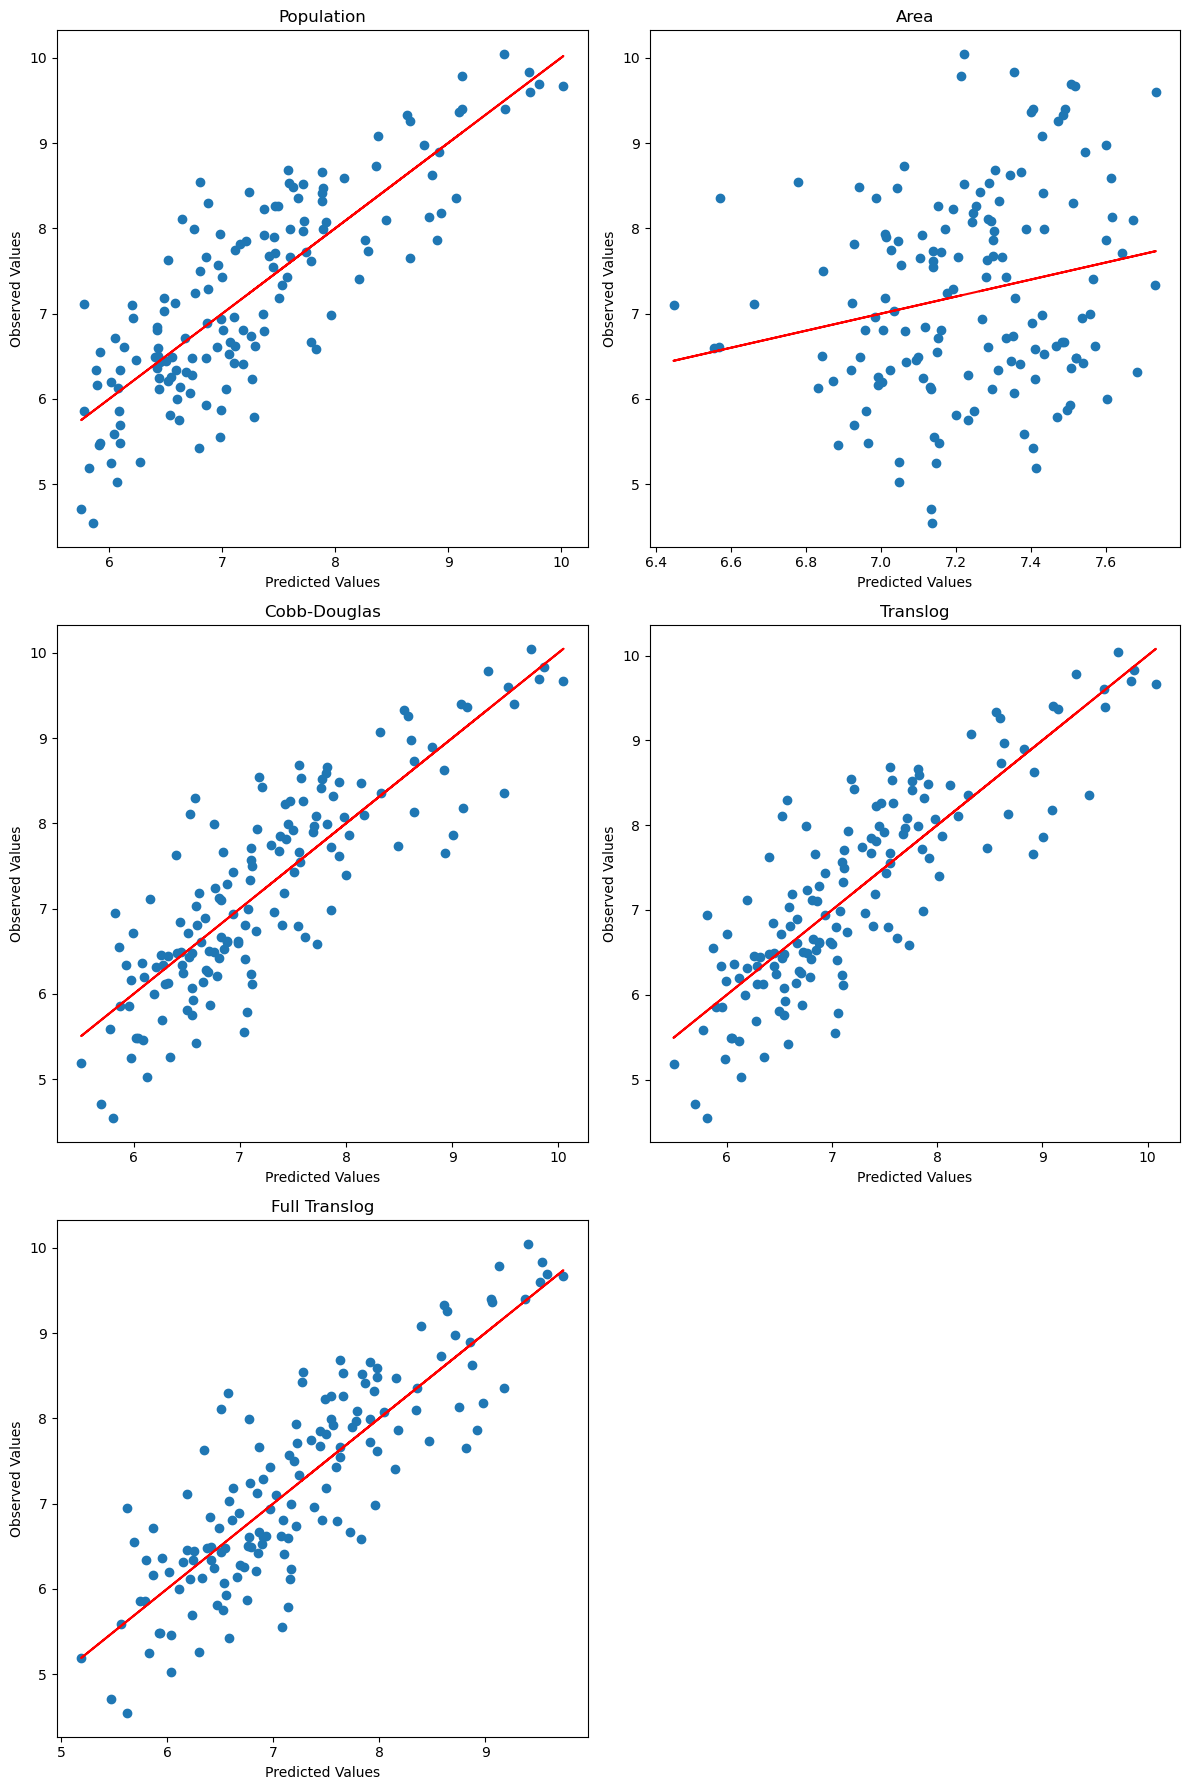

In [53]:
print(summary_col([ols_result_p,ols_result_a,ols_result,ols_result_i,ols_result_f], stars=True))

%matplotlib inline

plt.figure(figsize=(12,18))

plt.subplot(3, 2, 1)
plt.scatter(y_pred_p, y.values)
plt.plot(y_pred_p, y_pred_p, color='red')
plt.title('Population')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')

plt.subplot(3, 2, 2)
plt.scatter(y_pred_a, y.values)
plt.plot(y_pred_a, y_pred_a, color='red')
plt.title('Area')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')

plt.subplot(3, 2, 3)
plt.scatter(y_pred, y.values)
plt.plot(y_pred, y_pred, color='red')
plt.title('Cobb-Douglas')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')

plt.subplot(3, 2, 4)
plt.scatter(y_pred_i, y.values)
plt.plot(y_pred_i, y_pred_i, color='red')
plt.title('Translog')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')

plt.subplot(3, 2, 5)
plt.scatter(y_pred_f, y.values)
plt.plot(y_pred_f, y_pred_f, color='red')
plt.title('Full Translog')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.tight_layout()
plt.show()

### Out of sample performance
Distribution of RMSE scores from repeated 5-fold cross validation.

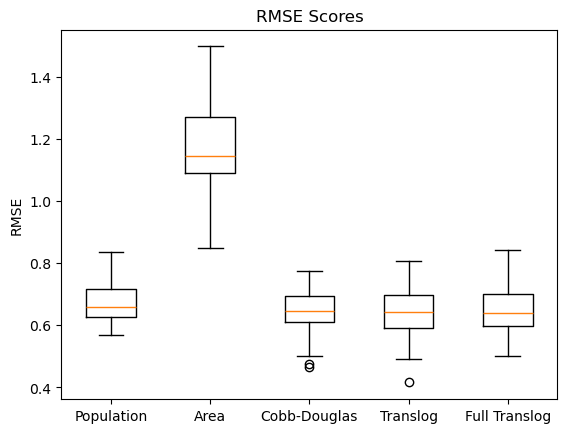

In [43]:
plt.boxplot([rmse_scores_p, rmse_scores_a, rmse_scores, rmse_scores_i, rmse_scores_f], labels=['Population', 'Area','Cobb-Douglas', 'Translog','Full Translog'])
plt.title('RMSE Scores')
plt.ylabel('RMSE')
plt.show()